In [61]:
files = ['/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_ar_atomicVerbs_bertsentenceEmbedding_output/arabertv02_nliv2_ar_Cluster2_Embdim5_PCA.p',
        '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_cs_atomicVerbs_bertsentenceEmbedding_output/robeczech-base_nliv2_cs_Cluster2_Embdim5_PCA.p',
        '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_de_atomicVerbs_bertsentenceEmbedding_output/gbert-base_nliv2_de_Cluster2_Embdim5_PCA.p',
        '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_en_atomicVerbs_bertsentenceEmbedding_output/bert-base-cased_nliv2_en_Cluster2_Embdim5_PCA.p',
        '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_zh_atomicVerbs_bertsentenceEmbedding_output/bert-base-chinese_nliv2_zh_Cluster2_Embdim5_PCA.p']

In [62]:
import pickle

In [63]:
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [64]:
all_data =[]
for f in files:
    all_data.append(pickle.load(open(f, "rb")))

/home/bjoern.aa/anaconda3/envs/patrick3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [65]:
all_data[0].keys()

dict_keys(['clustered_sentences', 'projection', 'Y', 'mean', 'std', 'actions_colors', 'corpus_embeddings', 'sign'])

In [66]:
import os
os.environ['PATH'] += '/usr/local/texlive/2022/bin/x86_64-linux/'
from matplotlib import rc


import matplotlib.pyplot as plt

import numpy as np
import argparse
import os
from matplotlib import rc
rc('text', usetex=False)

parser = argparse.ArgumentParser(description='Crazy Stuff')
parser.add_argument('--data_cluster', default=None, type=str,
                    help='data name', required=True)
parser.add_argument('--data', default=None, type=str,
                    help='data name', required=True)
parser.add_argument('--model', default=None, type=str,
                    help='model name: bert, use_hub, use_rcv1, ...', required=True)
parser.add_argument('--cluster', default=None, type=int,
                    help='num cluster', required=True)
parser.add_argument('--dim', default=None, type=int,
                    help='dimension of embedding', required=True)
parser.add_argument('--bert_model_name', default="bert-large-nli-mean-tokens", type=str,
                    help='data name')
# parser.add_argument('--projection', help='project emb to 2D', action='store_true')


colors_a = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#99e691',
            '#17becf', '#f0d213', '#F79F1F', '#EE5A24', '#EA2027']


def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)



def plot_stuf(filename_pickled_cluster, scale=1):

    moralprojection_model = pickle.load(open(filename_pickled_cluster, "rb"))
    clustered_sentences = moralprojection_model["clustered_sentences"]
    dim_reduc = moralprojection_model["projection"]
    Y = moralprojection_model["Y"]
    actions_colors = moralprojection_model["actions_colors"]
    corpus_embeddings = moralprojection_model["corpus_embeddings"]

    from matplotlib.ticker import NullFormatter


    # Y = tsne.fit_transform(corpus_embeddings[0])
    # Y = res
    ensure_dir(filename_pickled_cluster.replace(".p", "/figures/moral_projection.pdf"))
    norm = 8.946814
    fig, ax = plt.subplots(figsize=(10, 8)) #20 12
    texts = []
    Y[:, 0] = Y[:, 0] / np.max(Y[:, 0]) * scale
    Y[:, 1] = Y[:, 1] / np.max(Y[:, 1]) 
    plt.scatter(Y[:, 0], Y[:, 1], c=[colors_a[0] if t <= 0 else colors_a[1] for t in Y[:, 0]])
    #ax.xaxis.set_major_formatter(NullFormatter())
    #ax.yaxis.set_major_formatter(NullFormatter())
    #plt.ylabel("2. PC", fontsize=26)
    #plt.xlabel("1. PC", fontsize=26)

    plt.axis('tight')
    csv_file = open(filename_pickled_cluster.replace(".p", "/figures/moral_projection.csv"), 'w')
    for i, txt in enumerate(corpus_embeddings[1]):
        texts.append(ax.text(Y[i][0], Y[i][1], txt,fontsize=20))
        csv_file.write(str(Y[i][0]) + "," + txt + '\n')
    csv_file.close()
    fig.patch.set_visible(False)
    #ax.axis('off')
    ax.set_xlim((-1.1, 1.1))
    ax.tick_params(axis='x', which='major', labelsize=24)
    ax.tick_params(axis='x', which='minor', labelsize=18)
    ax.get_yaxis().set_visible(False)
    plt.xlabel("Moral score", fontsize=20)
    ax.axvline(x=0, linewidth=2, color='r', ls="--", alpha=0.6)
    ax.axhline(y=0, linewidth=2, color='r', ls="--", alpha=0.6, xmin=0.01, xmax=0.99)
    y_x = Y[:, 0]
    x_max = np.max(y_x)
    x_min = np.min(y_x) #- 0.6
    y_max = np.max(Y[:, 1])
    #plt.scatter([x_max + 0.7], [0], marker=">", color='r', alpha=0.6, s=80)
    #plt.scatter([x_min - 0.1], [0], marker="<", color='r', alpha=0.6, s=80)
    #texts.append(ax.text(4., -1., "BERT's moral direction",fontsize=24, color='r', alpha=0.6))
    #ax.annotate("Dos", (x_max, y_max), fontSize="26")
    #ax.annotate("Don'ts", (x_min, y_max), fontSize="26")
    #ax.tick_params(axis='both', which='major', labelsize=26, direction='in')
    #ax.tick_params(axis='both', which='minor', labelsize=26, direction='in')
    #adjust_text(texts, only_move={'points': 'y', 'text': 'y', 'objects': 'xy'}, lim=500, backend='pdflatex')
    #plt.savefig("moral_projection.png") #, bbox_inches='tight', usetex=False )
    #plt.close()
    #plt.clf()


In [67]:
files

['/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_ar_atomicVerbs_bertsentenceEmbedding_output/arabertv02_nliv2_ar_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_cs_atomicVerbs_bertsentenceEmbedding_output/robeczech-base_nliv2_cs_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_de_atomicVerbs_bertsentenceEmbedding_output/gbert-base_nliv2_de_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_en_atomicVerbs_bertsentenceEmbedding_output/bert-base-cased_nliv2_en_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_zh_atomicVerbs_bertsentenceEmbedding_output/bert-base-chinese_nliv2_zh_Cluster2_Embdim5_PCA.p']

0 /home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_ar_atomicVerbs_bertsentenceEmbedding_output/arabertv02_nliv2_ar_Cluster2_Embdim5_PCA.p
1 /home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_cs_atomicVerbs_bertsentenceEmbedding_output/robeczech-base_nliv2_cs_Cluster2_Embdim5_PCA.p
2 /home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_de_atomicVerbs_bertsentenceEmbedding_output/gbert-base_nliv2_de_Cluster2_Embdim5_PCA.p
3 /home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_en_atomicVerbs_bertsentenceEmbedding_output/bert-base-cased_nliv2_en_Cluster2_Embdim5_PCA.p
4 /home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_zh_atomicVerbs_bertsentenceEmbedding_output/bert-base-chinese_nliv2_zh_Cluster2_Embdim5_PCA.p


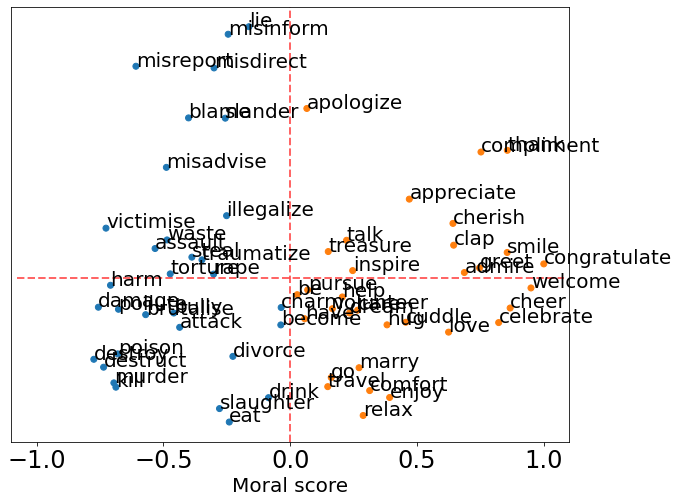

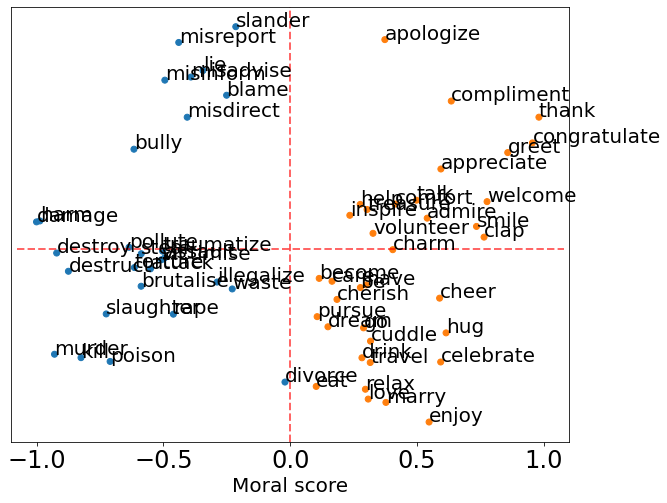

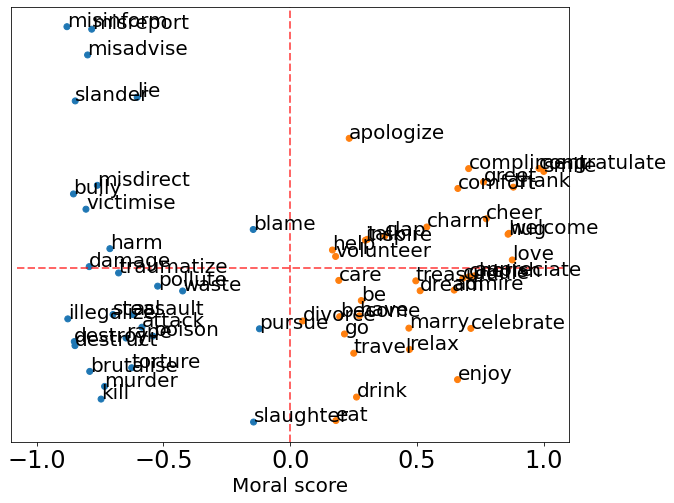

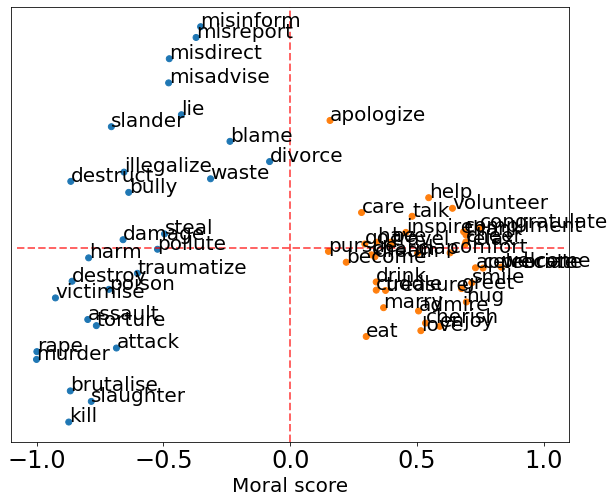

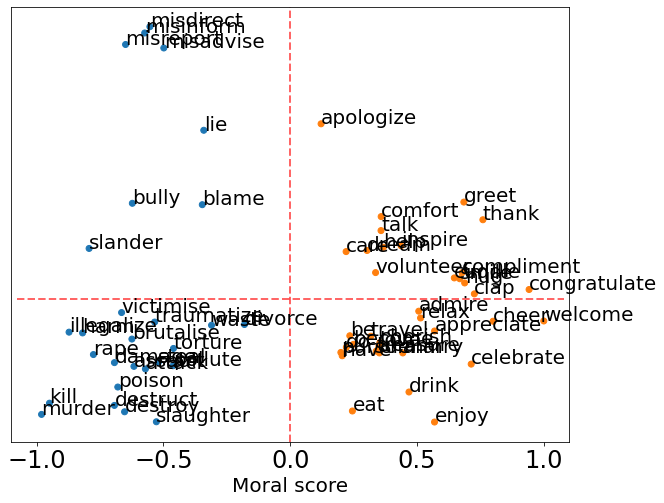

In [68]:
for i, f in enumerate(files):
    print(i, f)
    scale = 1 
    if i == 1 or i == 3:
        scale = -1
    plot_stuf(f, scale)

In [69]:
all_data[0].keys()

dict_keys(['clustered_sentences', 'projection', 'Y', 'mean', 'std', 'actions_colors', 'corpus_embeddings', 'sign'])

In [70]:
all_data[0]['corpus_embeddings']

(array([[-2.3674903e+00, -4.3707762e+00,  2.6134200e+00, -2.5543072e+00,
         -2.5515268e+00],
        [-5.1688886e+00,  7.0754447e+00, -1.6346947e+00,  2.8175449e+00,
          3.3432946e+00],
        [ 3.2466588e+00, -1.5710498e+00,  2.8252347e+00, -3.5097072e+00,
          8.5681143e+00],
        [-5.8402829e+00, -3.6553018e+00,  4.5057597e+00, -2.7009573e+00,
         -1.8622133e+00],
        [ 2.4473395e+00, -4.6009812e+00, -6.3489246e+00,  7.5927114e-01,
          2.8582699e+00],
        [ 5.4563227e+00,  1.8207320e+00,  4.3004241e+00,  4.2778948e-01,
         -4.5674071e+00],
        [ 7.2784810e+00,  4.2642694e+00,  6.6484790e+00,  4.6388106e+00,
         -3.2329094e+00],
        [ 2.2607443e+00, -1.0807068e+00, -6.7924091e-05,  4.5936480e+00,
          5.1154500e-01],
        [ 8.0712204e+00, -3.3726200e-01,  2.2082269e+00, -3.3011315e-03,
          2.4846218e+00],
        [-6.5799174e+00, -2.7225366e+00,  3.1130481e+00,  3.0313456e-01,
         -1.9726102e+00],
        [-

In [71]:
all_data_values = {}
all_data_values_2 = {}
all_data_values_2_only = {}

for i,ad in enumerate(all_data): 
    for j,w in enumerate(ad['corpus_embeddings'][1]):
        if w not in all_data_values:
            all_data_values[w] = []
            all_data_values_2[w]= []
            all_data_values_2_only[w]= []
        scale = 1
        if i in [1,3]:
            scale = -1
        all_data_values[w].append(scale*ad['corpus_embeddings'][0][j,0] )
        all_data_values_2[w].append([scale*ad['corpus_embeddings'][0][j,0], ad['corpus_embeddings'][0][j,1]])
        all_data_values_2_only[w].append(ad['corpus_embeddings'][0][j,1] )



In [72]:
all_data_values

{'slaughter': [-2.367490291595459,
  -1.9296684265136719,
  -1.2215659618377686,
  -4.871134578732634,
  -3.4542131423950195],
 'misreport': [-5.168888568878174,
  -1.1687592267990112,
  -6.625134468078613,
  -2.30456454555643,
  -4.2498064041137695],
 'hug': [3.2466588020324707,
  1.6355690956115723,
  7.27498197555542,
  4.316783972168376,
  4.506076335906982],
 'kill': [-5.840282917022705,
  -2.1941704750061035,
  -6.312443256378174,
  -5.4234792664524205,
  -6.214446067810059],
 'relax': [2.4473395347595215,
  0.7892593741416931,
  3.9849064350128174,
  4.286496270540438,
  3.366755247116089],
 'cherish': [5.45632266998291,
  0.4914224147796631,
  5.9739789962768555,
  3.3149878859580646,
  2.3175060749053955],
 'thank': [7.2784810066223145,
  2.609870672225952,
  7.452286720275879,
  4.307797070637878,
  4.976783275604248],
 'care': [2.260744333267212,
  0.4392887055873871,
  1.6235244274139404,
  1.7491610428264333,
  1.4448931217193604],
 'welcome': [8.071220397949219,
  2.06590

In [73]:
import pandas as pd

In [74]:
pdall = pd.DataFrame(all_data_values)

In [75]:
pdall

,slaughter,misreport,hug,kill,relax,cherish,thank,care,welcome,destroy,...,cheer,torture,admire,rape,harm,blame,steal,pursue,misinform,celebrate
0,-2.367490,-5.168889,3.246659,-5.840283,2.447340,5.456323,7.278481,2.260744,8.071220,-6.579917,...,7.372991,-4.019014,5.838541,-2.564663,-6.020964,-3.405429,-3.293446,0.587260,-2.077377,6.988497
1,-1.929668,-1.168759,1.635569,-2.194170,0.789259,0.491422,2.609871,0.439289,2.065907,-2.449534,...,1.567890,-1.634338,1.437899,-1.225157,-2.625141,-0.666707,-1.562098,0.283054,-1.314628,1.579207
2,-1.221566,-6.625134,7.274982,-6.312443,3.984906,5.973979,7.452287,1.623524,7.305109,-7.207062,...,6.547312,-5.291305,5.476717,-5.480051,-6.018708,-1.232924,-5.914465,-1.025232,-7.452380,6.033034
3,-4.871135,-2.304565,4.316784,-5.423479,4.286496,3.314988,4.307797,1.749161,5.171320,-5.341273,...,4.304646,-4.747816,3.145013,-6.205098,-4.936546,-1.474101,-3.077727,0.938411,-2.193602,4.725801
4,-3.454213,-4.249806,4.506076,-6.214446,3.366755,2.317506,4.976783,1.444893,6.549172,-4.275367,...,5.239199,-3.013085,3.320882,-5.079943,-5.359879,-2.268643,-3.402348,1.309854,-3.755870,4.674722


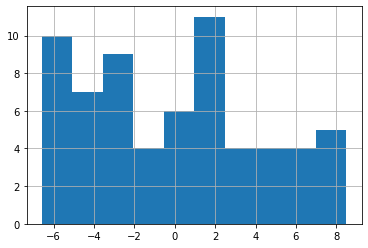

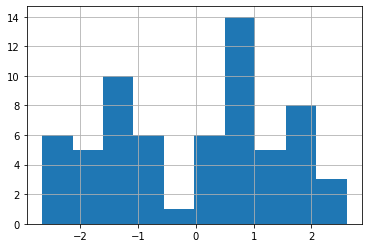

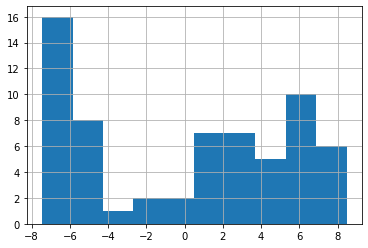

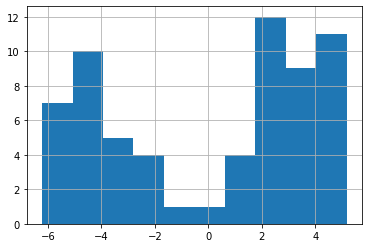

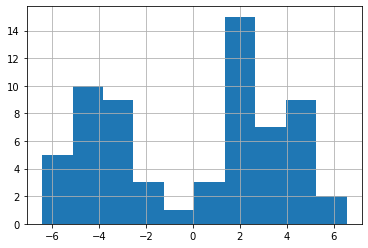

In [76]:
for i in range(5):
    plt.figure()
    pdall.iloc[i].hist()

In [77]:
files

['/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_ar_atomicVerbs_bertsentenceEmbedding_output/arabertv02_nliv2_ar_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_cs_atomicVerbs_bertsentenceEmbedding_output/robeczech-base_nliv2_cs_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_de_atomicVerbs_bertsentenceEmbedding_output/gbert-base_nliv2_de_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_en_atomicVerbs_bertsentenceEmbedding_output/bert-base-cased_nliv2_en_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_zh_atomicVerbs_bertsentenceEmbedding_output/bert-base-chinese_nliv2_zh_Cluster2_Embdim5_PCA.p']

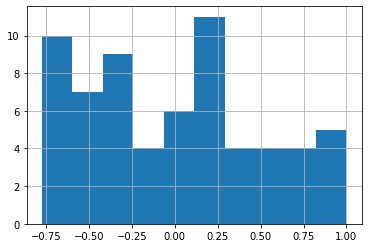

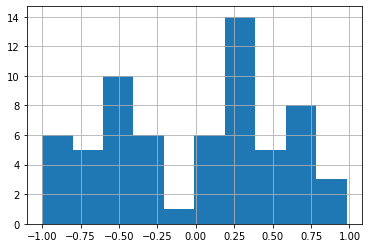

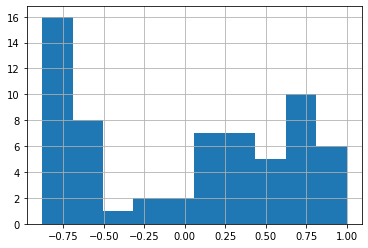

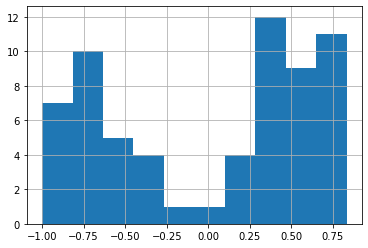

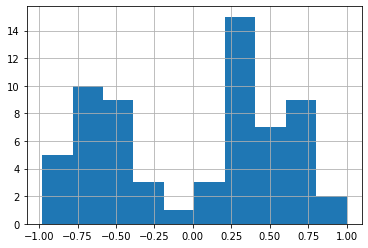

In [78]:
for i in range(5):
    plt.figure()
    (pdall.iloc[i]/pdall.iloc[i].abs().max()).hist()

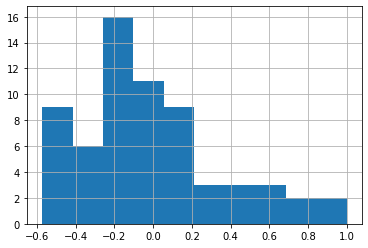

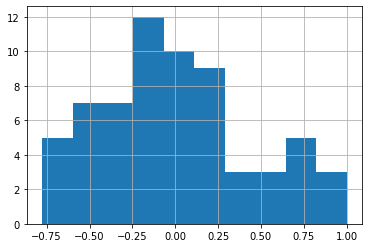

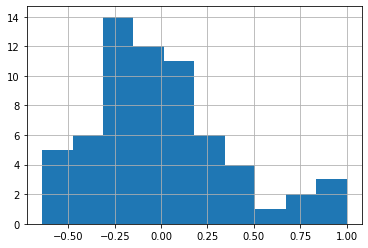

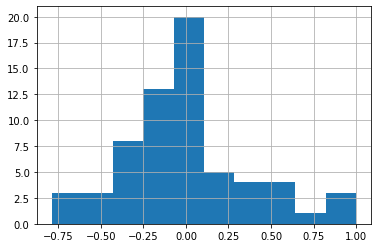

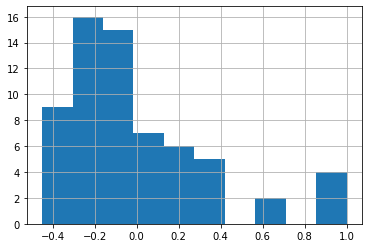

In [79]:
pdall_2 = pd.DataFrame(all_data_values_2_only)
for i in range(5):
    plt.figure()
    (pdall_2.iloc[i]/pdall_2.iloc[i].abs().max()).hist()

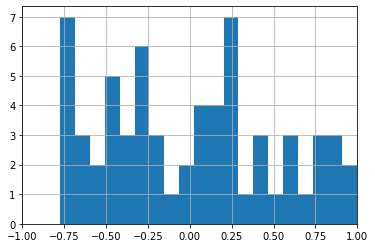

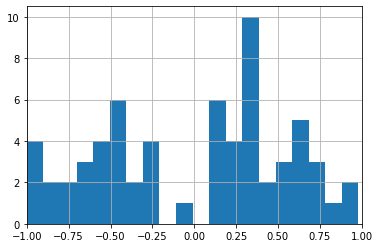

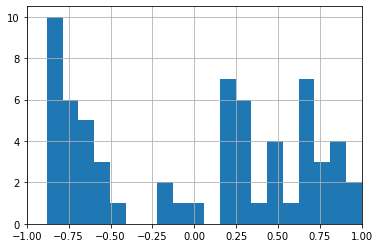

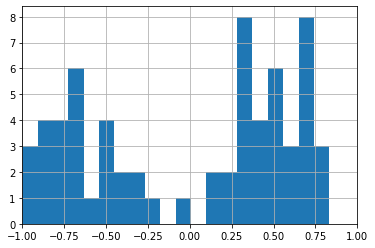

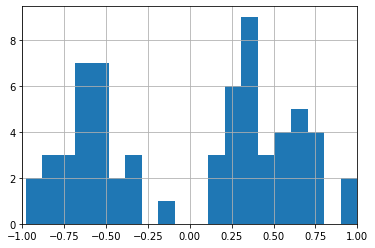

In [80]:
for i in range(5):
    plt.figure()
    (pdall.iloc[i]/pdall.iloc[i].abs().max()).hist(bins=20)
    plt.xlim(-1,1)

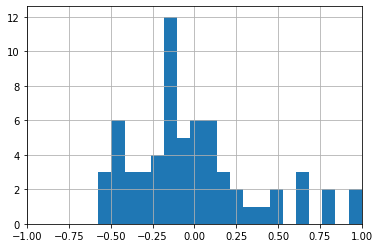

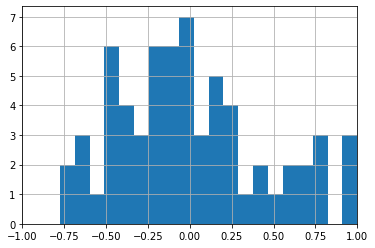

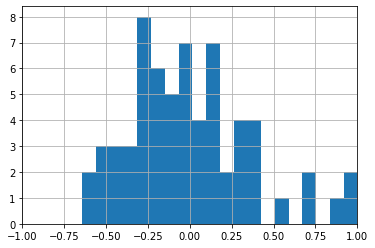

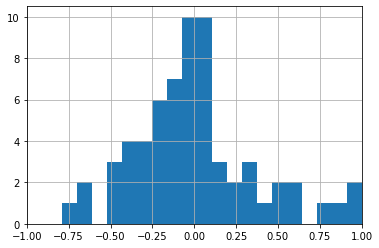

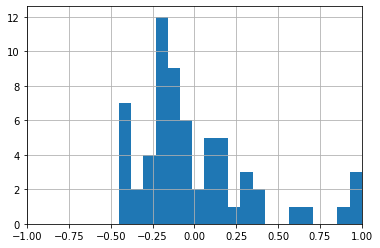

In [81]:
pdall_2 = pd.DataFrame(all_data_values_2_only)
for i in range(5):
    plt.figure()
    (pdall_2.iloc[i]/pdall_2.iloc[i].abs().max()).hist(bins=20)
    plt.xlim(-1,1)

In [82]:
pdall.columns

Index(['slaughter', 'misreport', 'hug', 'kill', 'relax', 'cherish', 'thank',
       'care', 'welcome', 'destroy', 'bully', 'illegalize', 'destruct',
       'victimise', 'apologize', 'talk', 'clap', 'drink', 'be', 'eat',
       'congratulate', 'poison', 'brutalise', 'murder', 'lie', 'traumatize',
       'misdirect', 'compliment', 'enjoy', 'volunteer', 'travel', 'have',
       'attack', 'marry', 'love', 'dream', 'assault', 'help', 'go', 'treasure',
       'comfort', 'smile', 'misadvise', 'pollute', 'divorce', 'greet', 'charm',
       'damage', 'slander', 'waste', 'appreciate', 'become', 'inspire',
       'cuddle', 'cheer', 'torture', 'admire', 'rape', 'harm', 'blame',
       'steal', 'pursue', 'misinform', 'celebrate'],
      dtype='object')

(array([10.,  5., 12., 11.,  7.,  7.,  3.,  3.,  2.,  4.]),
 array([0.18595125, 0.88227626, 1.57860128, 2.2749263 , 2.97125132,
        3.66757633, 4.36390135, 5.06022637, 5.75655138, 6.4528764 ,
        7.14920142]),
 <a list of 10 Patch objects>)

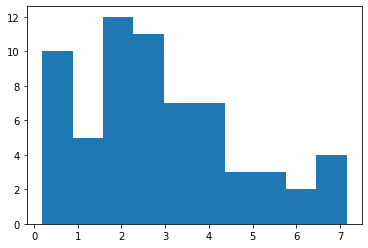

In [83]:
plt.hist([pdall[k].var() for k in pdall.columns])

In [84]:
keys = [k for k,v in [(k, pdall[k].var()) for k in pdall.columns] if v < 1]
keys_high = [k for k,v in [(k, pdall[k].var()) for k in pdall.columns] if v > 5]

In [85]:
all_data_values_2

{'slaughter': [[-2.367490291595459, -4.370776],
  [-1.9296684265136719, -0.7179638],
  [-1.2215659618377686, -6.4091387],
  [-4.871134578732634, -5.033700504340624],
  [-3.4542131423950195, -3.723502]],
 'misreport': [[-5.168888568878174, 7.0754447],
  [-1.1687592267990112, 2.2946727],
  [-6.625134468078613, 9.8857],
  [-2.30456454555643, 6.896256031755107],
  [-4.2498064041137695, 7.7604275]],
 'hug': [[3.2466588020324707, -1.5710498],
  [1.6355690956115723, -0.9279803],
  [7.27498197555542, 1.3808279],
  [4.316783972168376, -1.774081756166371],
  [4.506076335906982, 0.5024402]],
 'kill': [[-5.840282917022705, -3.6553018],
  [-2.1941704750061035, -1.2030897],
  [-6.312443256378174, -5.4567623],
  [-5.4234792664524205, -5.7100634031562],
  [-6.214446067810059, -3.1573641]],
 'relax': [[2.4473395347595215, -4.600981],
  [0.7892593741416931, -1.5536308],
  [3.9849064350128174, -3.397955],
  [4.286496270540438, 0.11415533959595245],
  [3.366755247116089, -0.5635803]],
 'cherish': [[5.4563

In [86]:
all_array= []
for k in keys:
    all_array.extend(all_data_values_2[k])
npaa = np.array(all_array)

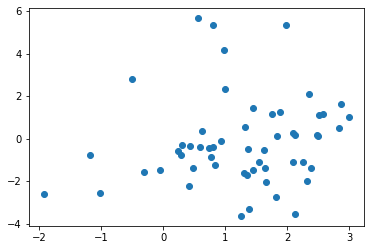

In [87]:
plt.scatter(npaa[:,0],npaa[:,1])

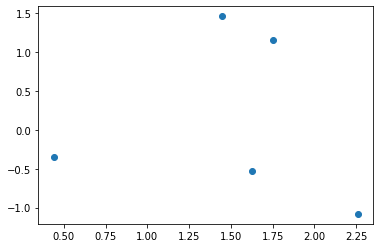

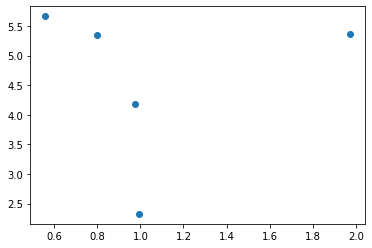

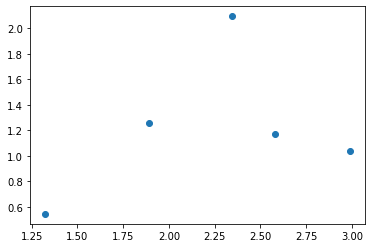

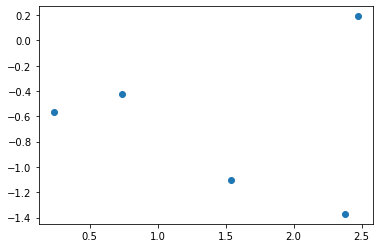

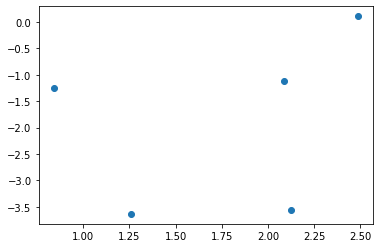

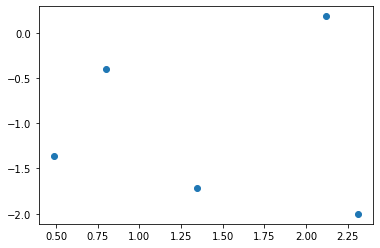

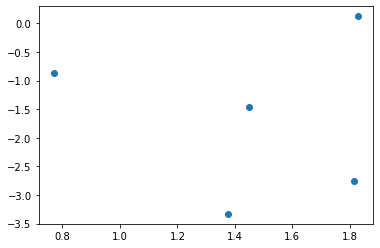

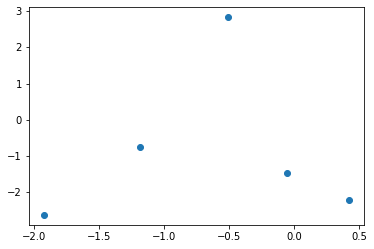

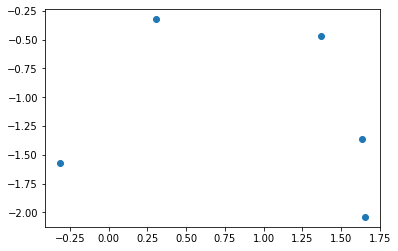

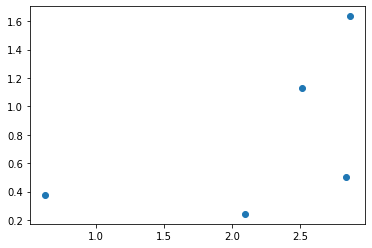

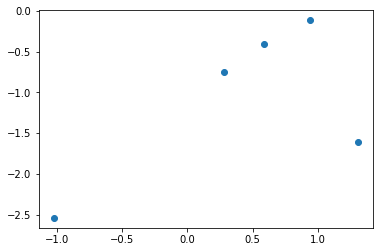

In [88]:
for k in keys:
    npa = np.array(all_data_values_2[k])
    plt.figure()
    plt.scatter(npa[:,0],npa[:,1])

In [89]:
pd_1_only = pd.DataFrame(all_data_values)

In [90]:
pd_2_only = pd.DataFrame(all_data_values_2_only)

In [91]:
for i in range(5):
    ci = pd_2_only.iloc[i]
    ci /= ci.abs().max()
    ci = pd_1_only.iloc[i]
    ci /= ci.abs().max()

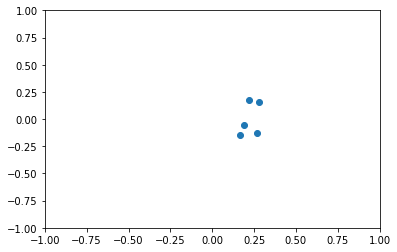

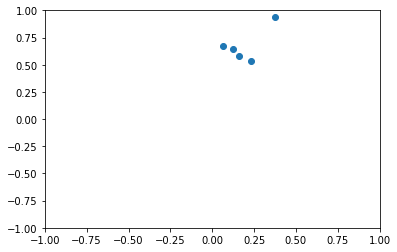

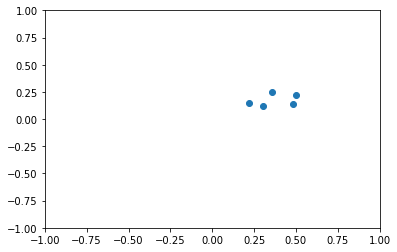

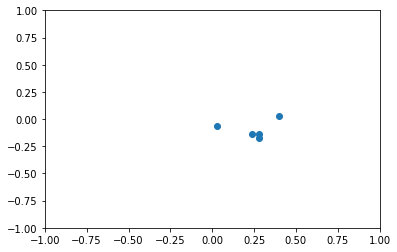

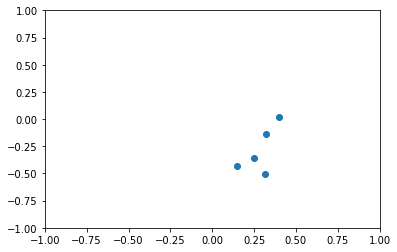

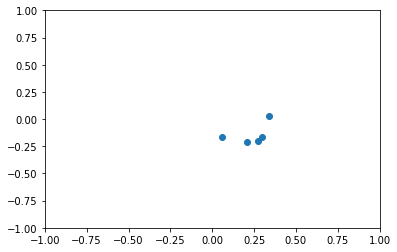

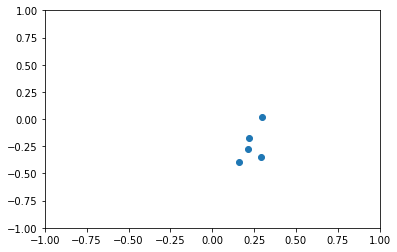

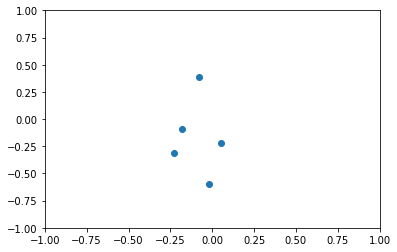

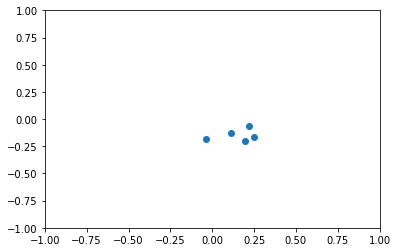

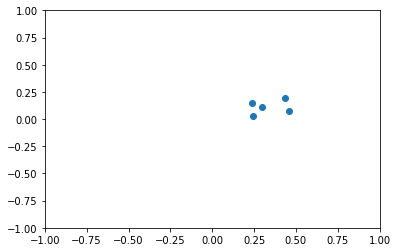

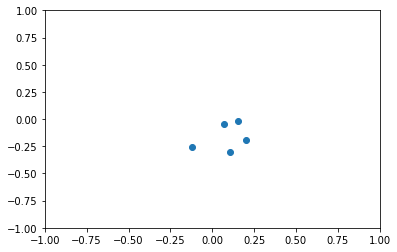

In [92]:
for k in keys:
    plt.figure()
    plt.scatter(pd_1_only[k],pd_2_only[k])
    plt.ylim(-1,1)
    plt.xlim(-1,1)


['cherish', 'welcome', 'illegalize', 'congratulate', 'love', 'smile', 'slander', 'cheer', 'misinform']


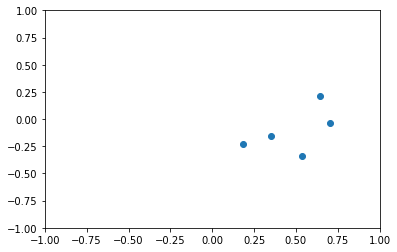

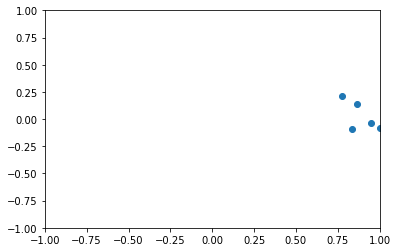

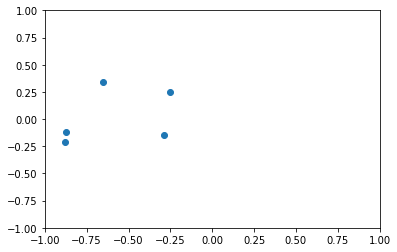

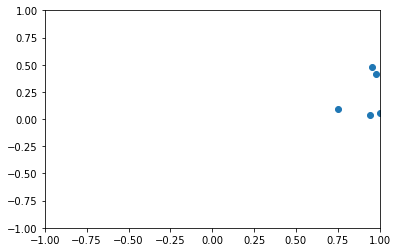

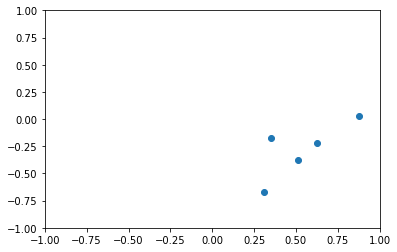

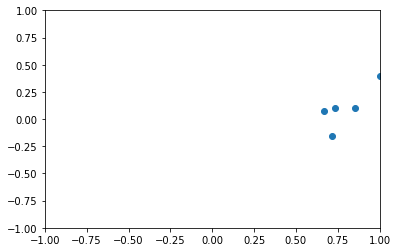

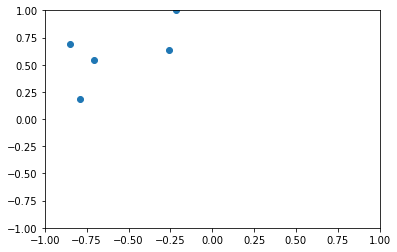

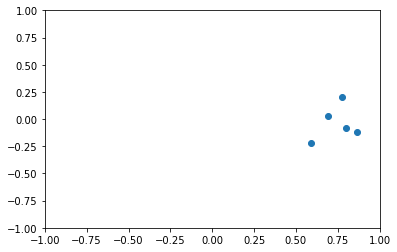

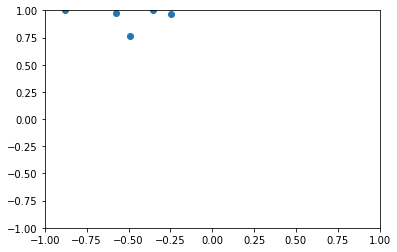

In [93]:
print(keys_high)
for k in keys_high:
    plt.figure()
    plt.scatter(pd_1_only[k],pd_2_only[k])
    plt.ylim(-1,1)
    plt.xlim(-1,1)


In [94]:
allnp =np.stack([pd_1_only.transpose().to_numpy(), pd_2_only.transpose().to_numpy()])
allnp = allnp.swapaxes(0,-1).swapaxes(0,1)

In [95]:
allnp.shape

(64, 5, 2)

In [96]:
varnp = allnp.var(axis=1)

(array([19., 11., 14.,  9.,  2.,  4.,  1.,  2.,  1.,  1.]),
 array([0.0123769 , 0.02537684, 0.03837677, 0.0513767 , 0.06437663,
        0.07737657, 0.0903765 , 0.10337643, 0.11637636, 0.12937629,
        0.14237623]),
 <a list of 10 Patch objects>)

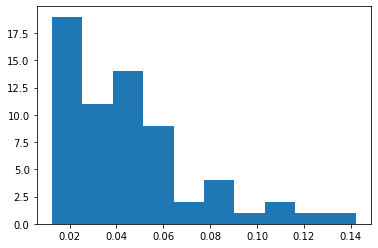

In [97]:
plt.hist(varnp.sum(axis=1))

In [98]:
varnp.sum(axis=1)

array([0.08204744, 0.02424018, 0.06099506, 0.02848032, 0.08716403,
       0.0727099 , 0.0444097 , 0.02119791, 0.02185391, 0.02822622,
       0.05698147, 0.12596126, 0.07202524, 0.04970141, 0.03155247,
       0.01359384, 0.02494591, 0.05322262, 0.01955606, 0.04668142,
       0.04414871, 0.01464496, 0.05466148, 0.01774619, 0.04161985,
       0.01631169, 0.07783621, 0.05474216, 0.02811933, 0.03894832,
       0.04503328, 0.01717945, 0.02039462, 0.03553375, 0.09742057,
       0.04354814, 0.03576719, 0.03106735, 0.02428815, 0.03533762,
       0.10378894, 0.04559951, 0.04811876, 0.01463533, 0.11516227,
       0.05970824, 0.05149417, 0.02966781, 0.14237623, 0.04206542,
       0.05256388, 0.01306112, 0.0123769 , 0.05001755, 0.02985949,
       0.03866969, 0.02531988, 0.0835767 , 0.01834731, 0.04580828,
       0.02748342, 0.02487773, 0.05566968, 0.02488385])

In [99]:
[i for i,v in enumerate(varnp.sum(axis=1)) if v < .025]

[1, 7, 8, 15, 16, 18, 21, 23, 25, 31, 32, 38, 43, 51, 52, 58, 61, 63]

In [100]:
pd_1_only.columns

Index(['slaughter', 'misreport', 'hug', 'kill', 'relax', 'cherish', 'thank',
       'care', 'welcome', 'destroy', 'bully', 'illegalize', 'destruct',
       'victimise', 'apologize', 'talk', 'clap', 'drink', 'be', 'eat',
       'congratulate', 'poison', 'brutalise', 'murder', 'lie', 'traumatize',
       'misdirect', 'compliment', 'enjoy', 'volunteer', 'travel', 'have',
       'attack', 'marry', 'love', 'dream', 'assault', 'help', 'go', 'treasure',
       'comfort', 'smile', 'misadvise', 'pollute', 'divorce', 'greet', 'charm',
       'damage', 'slander', 'waste', 'appreciate', 'become', 'inspire',
       'cuddle', 'cheer', 'torture', 'admire', 'rape', 'harm', 'blame',
       'steal', 'pursue', 'misinform', 'celebrate'],
      dtype='object')

misreport
kill
care
welcome
destroy
talk
clap
be
poison
murder
traumatize
enjoy
have
attack
go
pollute
damage
become
inspire
cheer
admire
harm
steal
pursue
celebrate


/tmp/ipykernel_3415407/1448111786.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


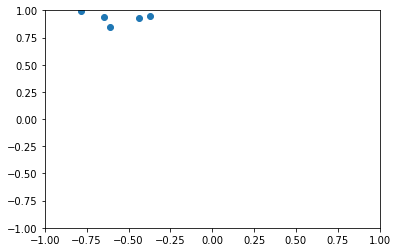

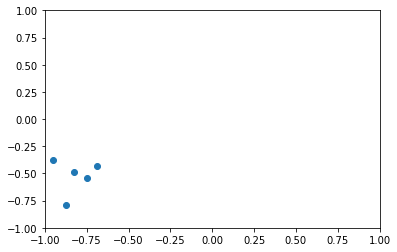

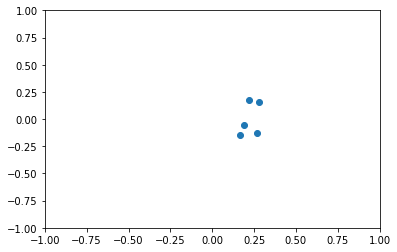

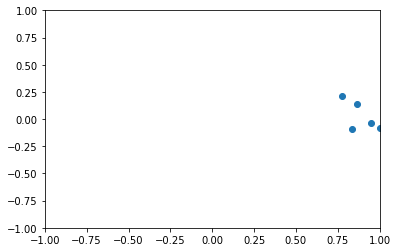

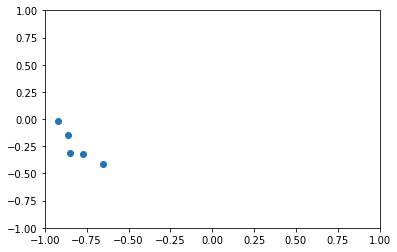

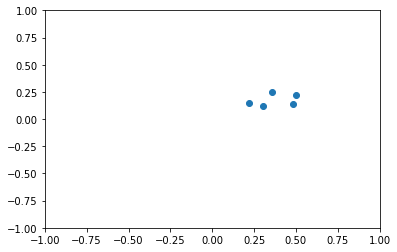

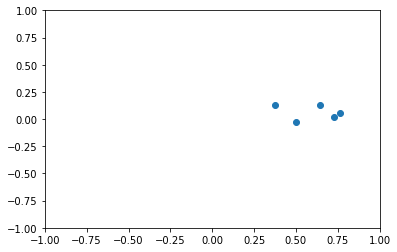

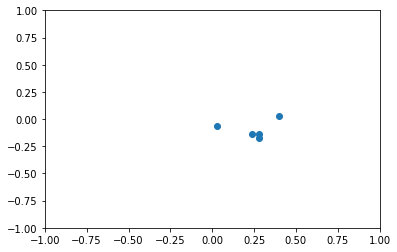

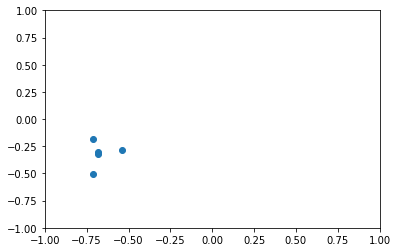

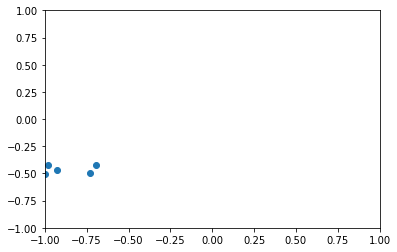

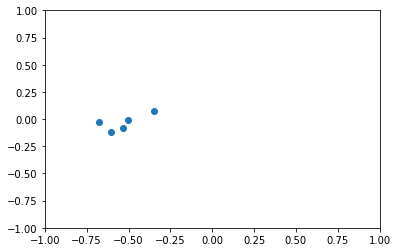

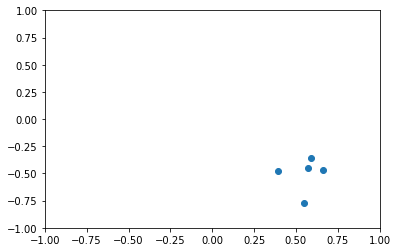

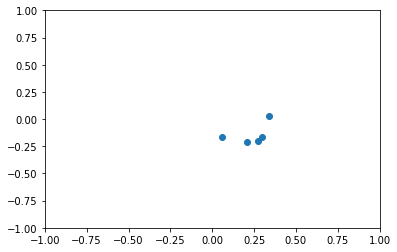

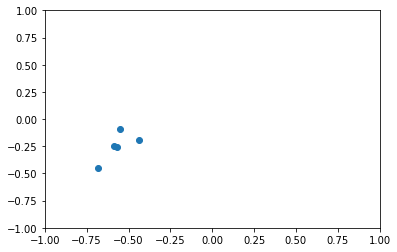

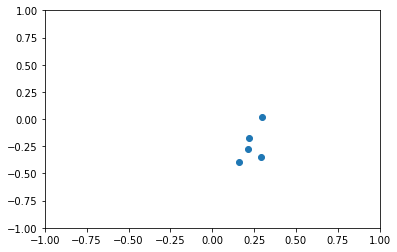

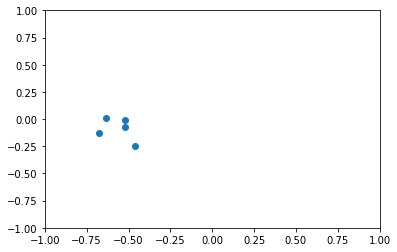

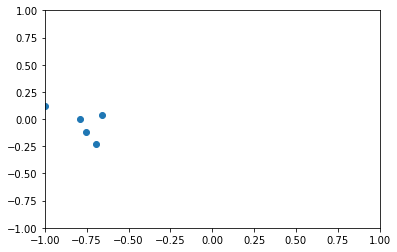

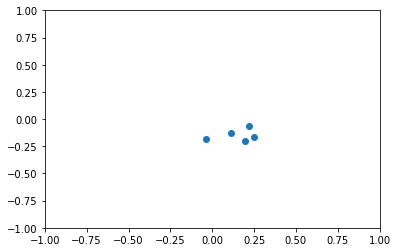

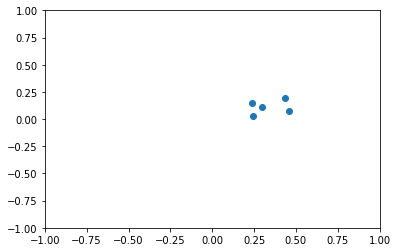

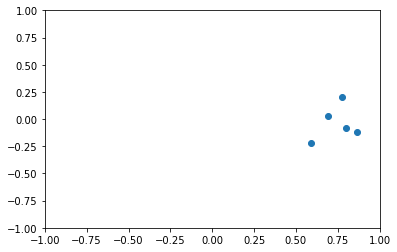

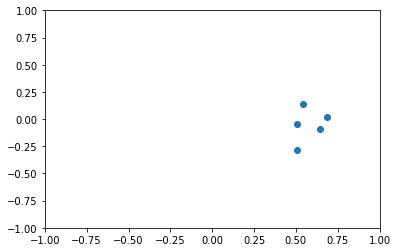

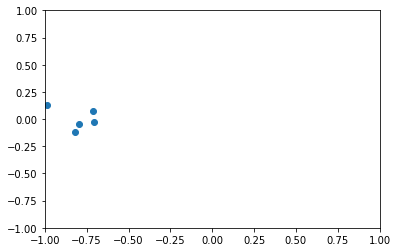

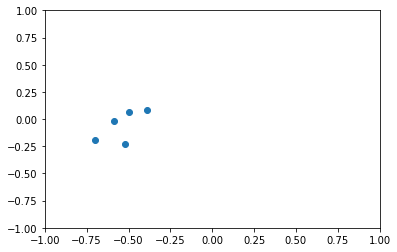

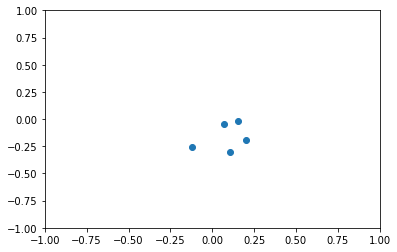

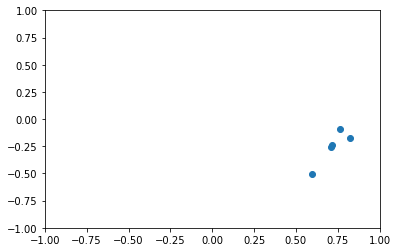

In [101]:
for i, k in enumerate(pd_1_only.columns):
    if i in [i for i,v in enumerate(varnp.sum(axis=1)) if v < .03]:
        print(k)
        plt.figure()
        plt.scatter(pd_1_only[k],pd_2_only[k])
        plt.ylim(-1,1)
        plt.xlim(-1,1)

slaughter
relax
illegalize
love
comfort
divorce
slander
rape


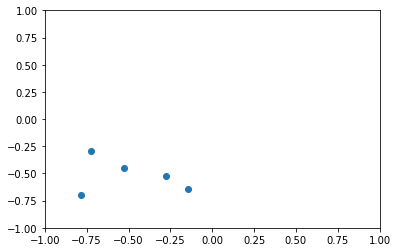

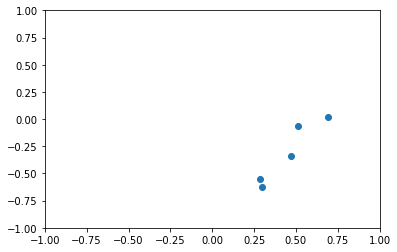

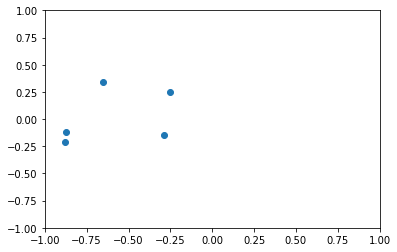

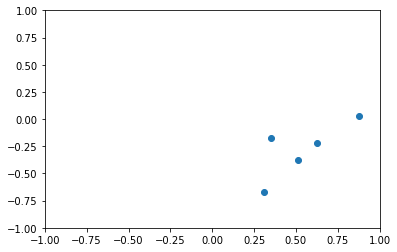

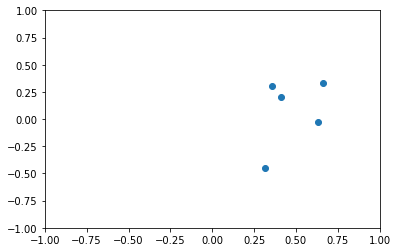

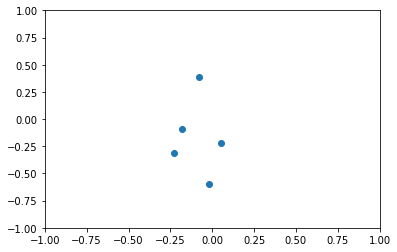

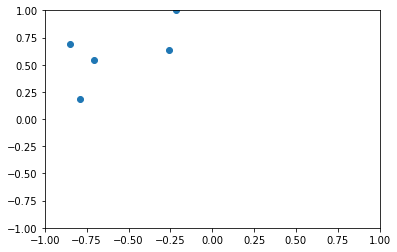

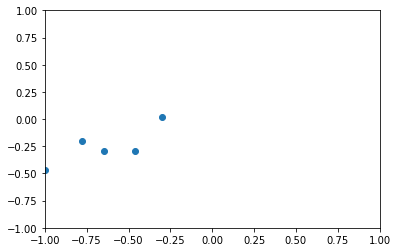

In [102]:
for i, k in enumerate(pd_1_only.columns):
    if i in [i for i,v in enumerate(varnp.sum(axis=1)) if v > .08]:
        print(k)
        plt.figure()
        plt.scatter(pd_1_only[k],pd_2_only[k])
        plt.ylim(-1,1)
        plt.xlim(-1,1)

In [103]:
varnp.shape

(64, 2)

In [104]:
pd_1_only['kill'].mean()

-0.8157629038180255

In [105]:
pd_1_only['kill'].tolist()

[-0.6870372244325754,
 -0.8245848926988943,
 -0.7454410259240197,
 -0.872861090835422,
 -0.9488902851992157]

/tmp/ipykernel_3415407/1663197777.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


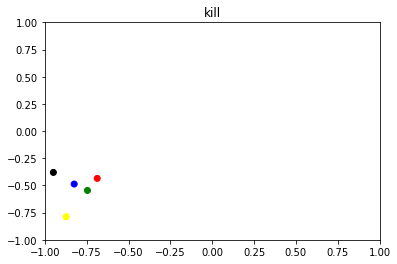

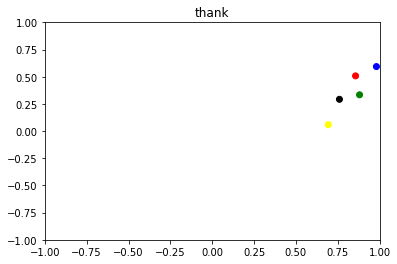

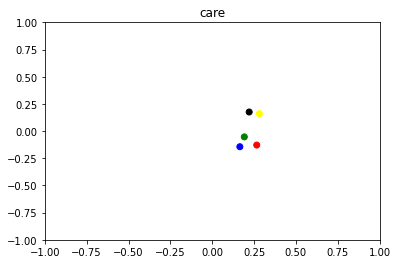

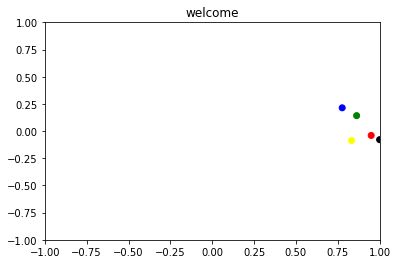

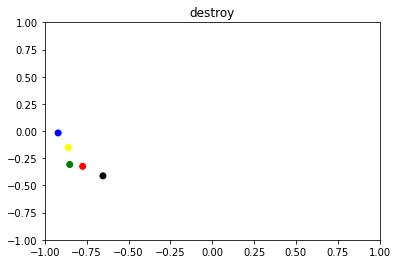

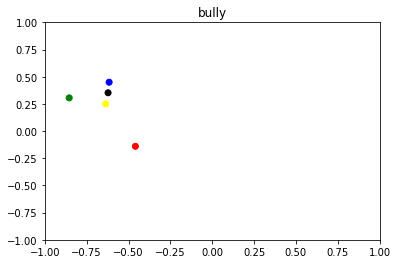

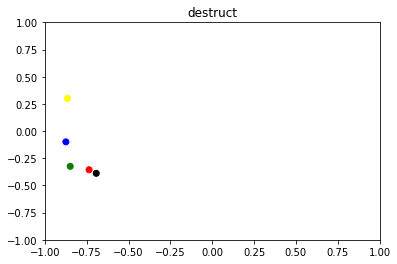

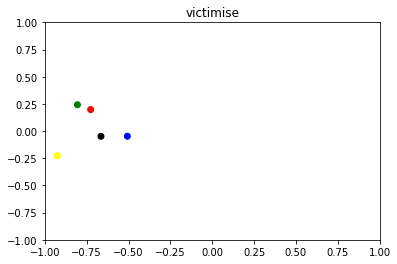

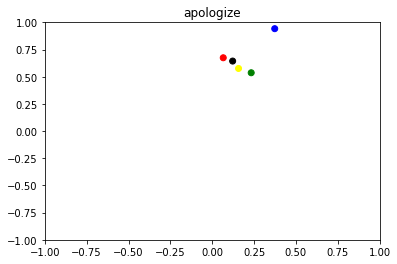

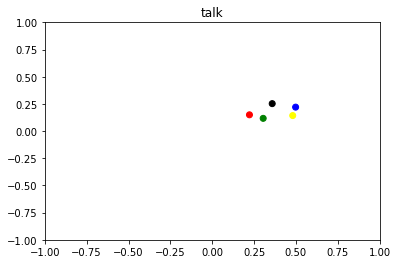

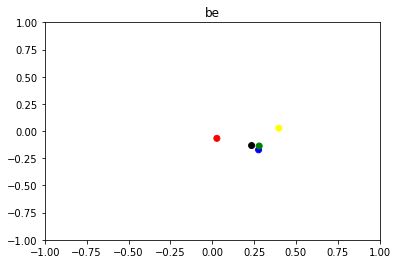

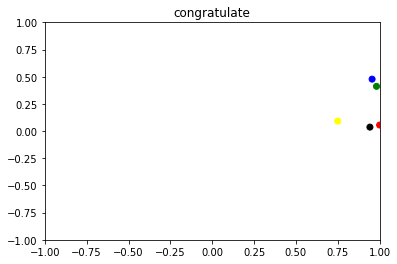

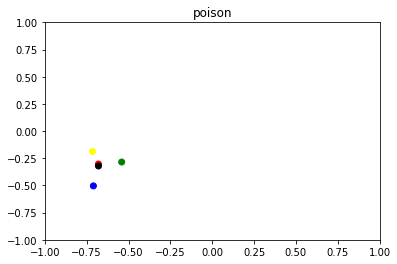

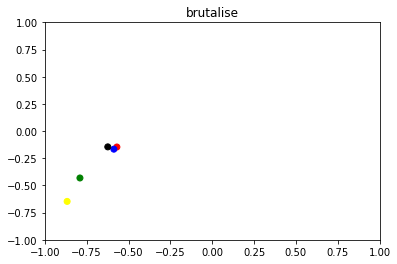

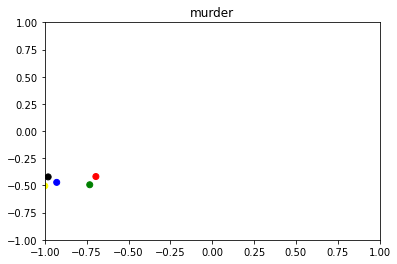

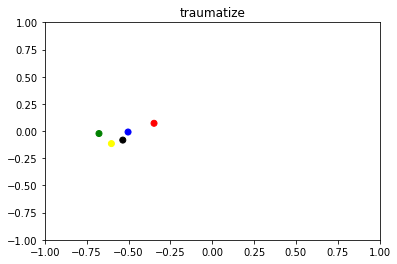

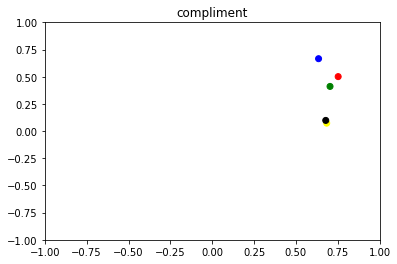

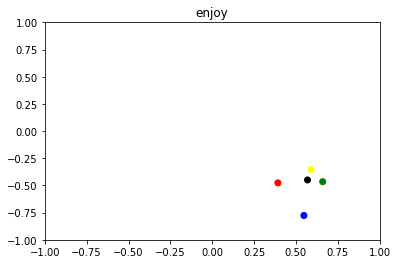

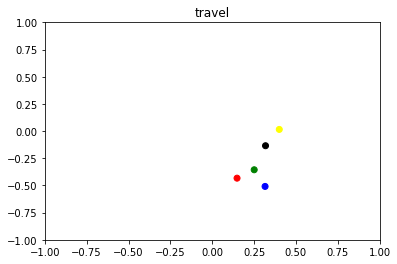

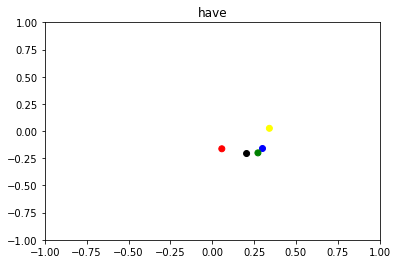

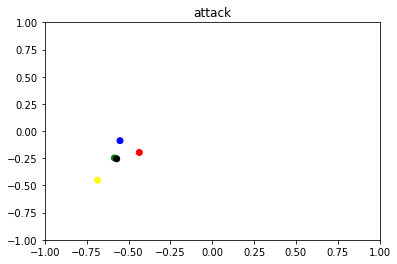

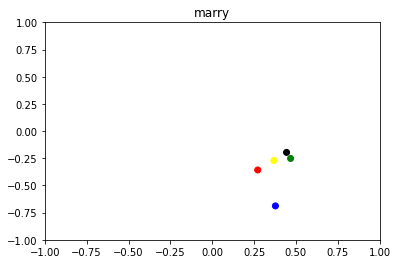

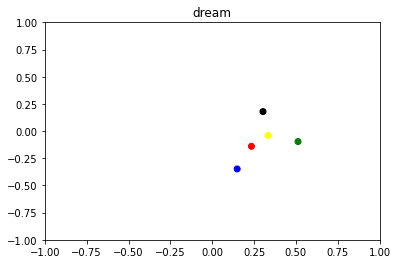

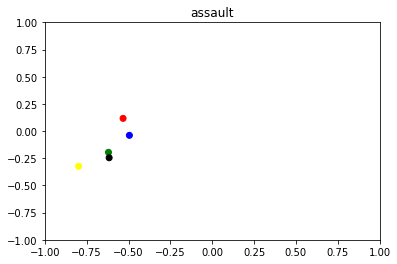

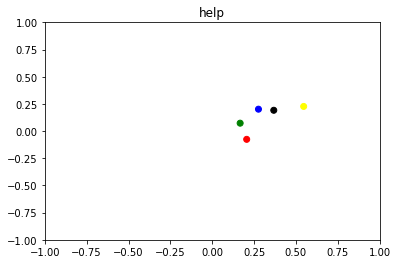

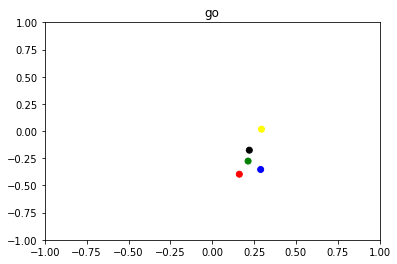

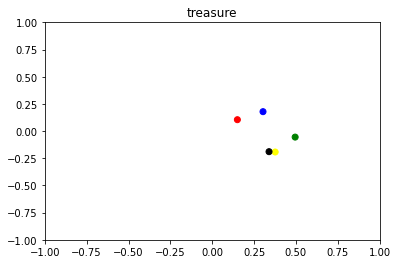

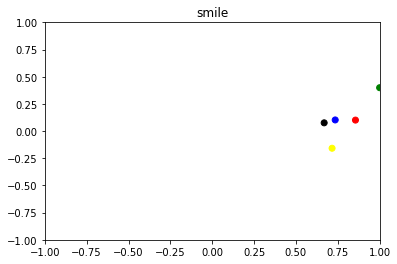

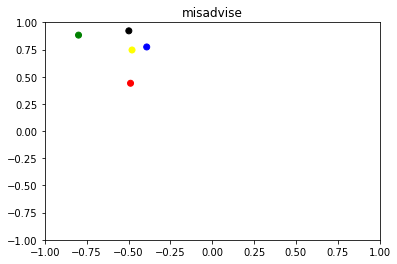

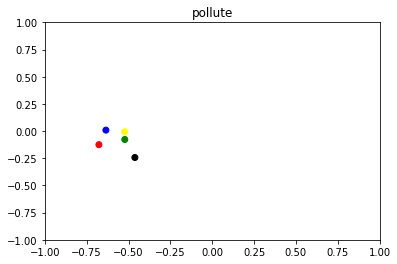

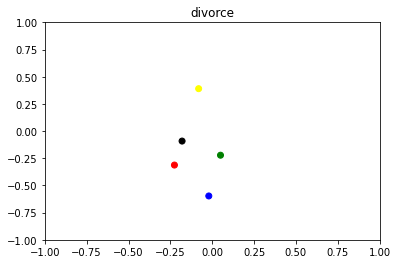

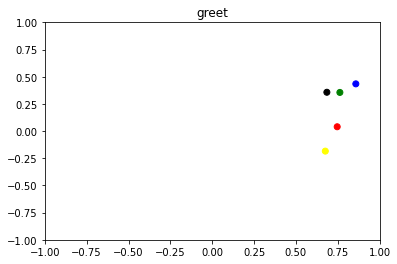

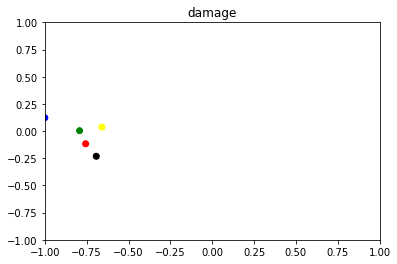

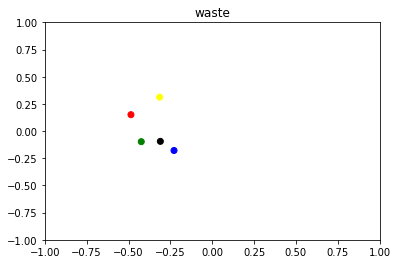

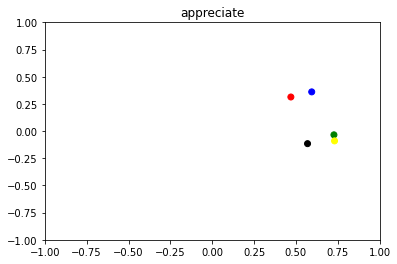

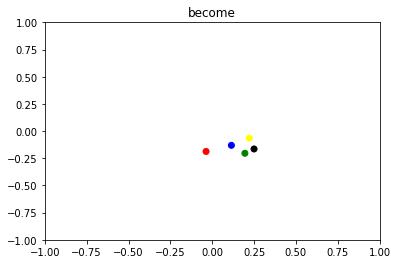

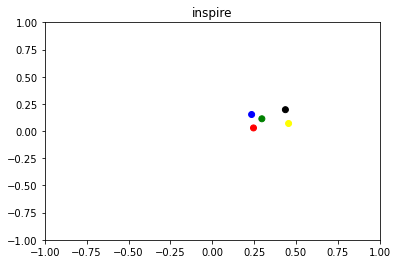

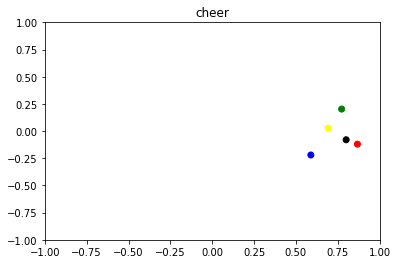

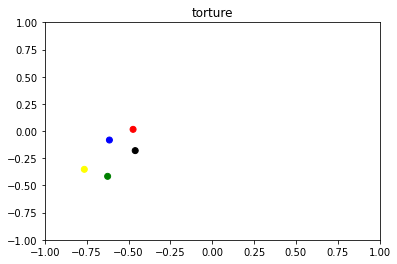

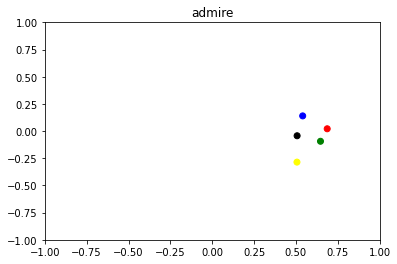

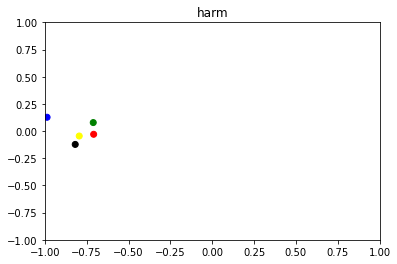

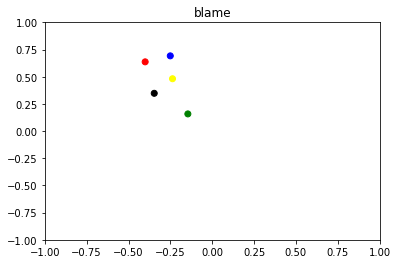

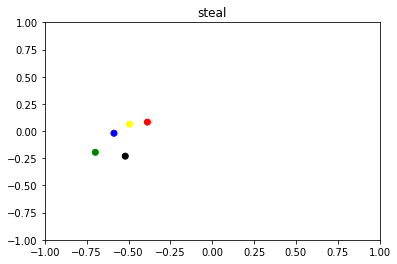

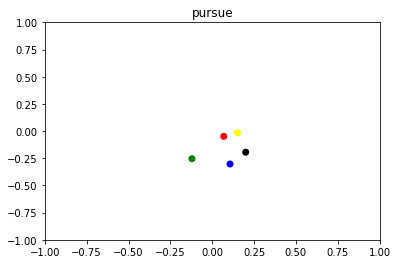

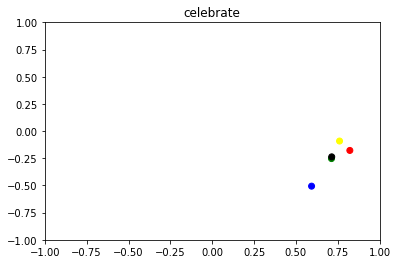

In [106]:
colors = ['red','blue','green','yellow','black']
for i, k in enumerate(pd_1_only.columns):
    if i in [i for i,v in enumerate(varnp[:,0]) if v < .02]:
        plt.figure()
        plt.title(k)
        plt.scatter(pd_1_only[k],pd_2_only[k],c=colors)
        plt.ylim(-1,1)
        plt.xlim(-1,1)

In [107]:
pd_1_only["slaughter"]

0   -0.278506
1   -0.725183
2   -0.144256
3   -0.783966
4   -0.527427
Name: slaughter, dtype: float64

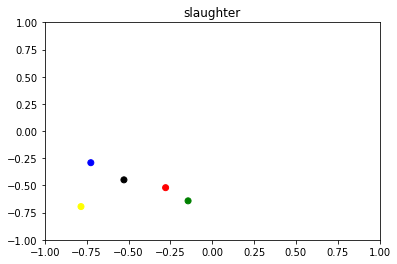

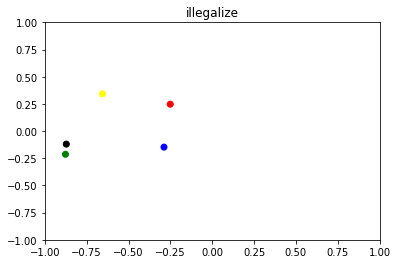

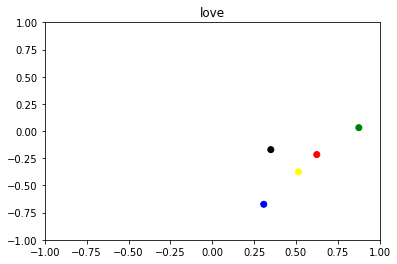

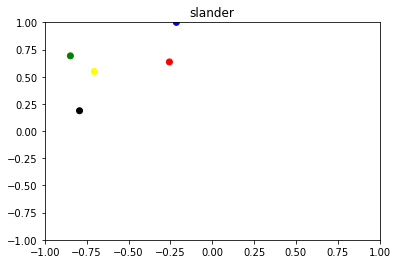

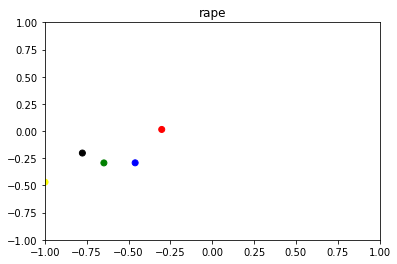

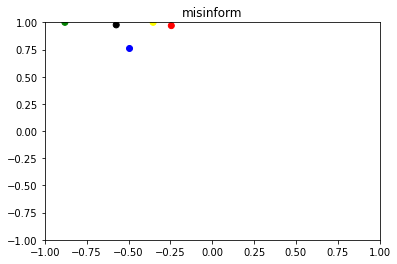

In [108]:
colors = ['red','blue','green','yellow','black']
for i, k in enumerate(pd_1_only.columns):
    if i in [i for i,v in enumerate(varnp[:,0]) if v > .04]:
        plt.figure()
        plt.title(k)
        plt.scatter(pd_1_only[k],pd_2_only[k],c=colors)
        plt.ylim(-1,1)
        plt.xlim(-1,1)

In [109]:
files

['/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_ar_atomicVerbs_bertsentenceEmbedding_output/arabertv02_nliv2_ar_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_cs_atomicVerbs_bertsentenceEmbedding_output/robeczech-base_nliv2_cs_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_de_atomicVerbs_bertsentenceEmbedding_output/gbert-base_nliv2_de_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_en_atomicVerbs_bertsentenceEmbedding_output/bert-base-cased_nliv2_en_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_zh_atomicVerbs_bertsentenceEmbedding_output/bert-base-chinese_nliv2_zh_Cluster2_Embdim5_PCA.p']

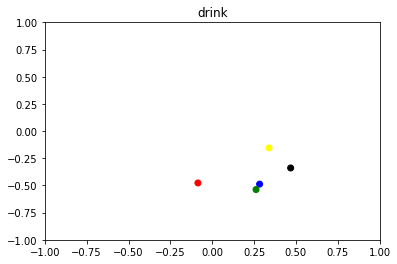

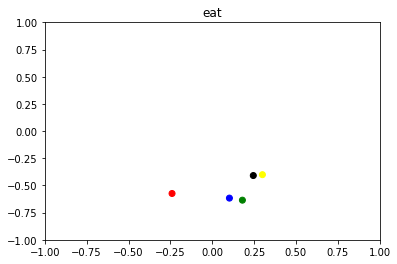

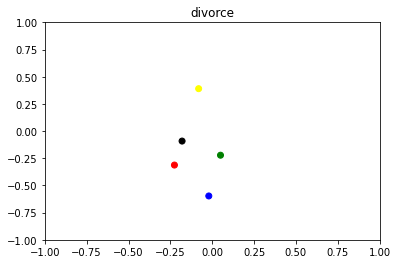

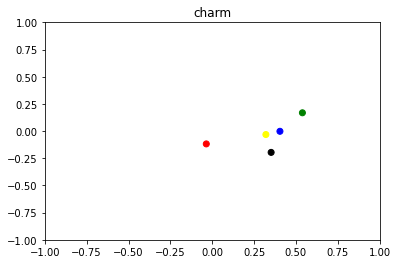

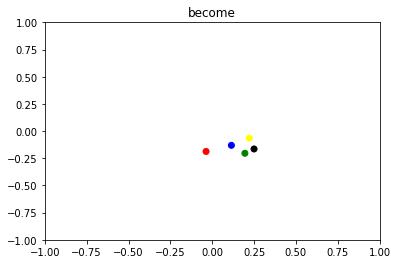

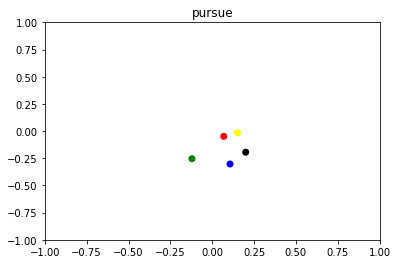

In [110]:
colors = ['red','blue','green','yellow','black']
for i, k in enumerate(pd_1_only.columns):
    if pd_1_only[k].max() > 0 and pd_1_only[k].min() < 0:
        plt.figure()
        plt.title(k)
        plt.scatter(pd_1_only[k],pd_2_only[k],c=colors)
        plt.ylim(-1,1)
        plt.xlim(-1,1)

In [111]:
for i, k in enumerate([ 'divorce','drink']):
    pd_2_only[k] += 2

In [112]:
files

['/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_ar_atomicVerbs_bertsentenceEmbedding_output/arabertv02_nliv2_ar_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_cs_atomicVerbs_bertsentenceEmbedding_output/robeczech-base_nliv2_cs_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_de_atomicVerbs_bertsentenceEmbedding_output/gbert-base_nliv2_de_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_en_atomicVerbs_bertsentenceEmbedding_output/bert-base-cased_nliv2_en_Cluster2_Embdim5_PCA.p',
 '/home/bjoern.aa/patrick/sberts/MoRT-mort-results-bias-cluster/None_zh_atomicVerbs_bertsentenceEmbedding_output/bert-base-chinese_nliv2_zh_Cluster2_Embdim5_PCA.p']

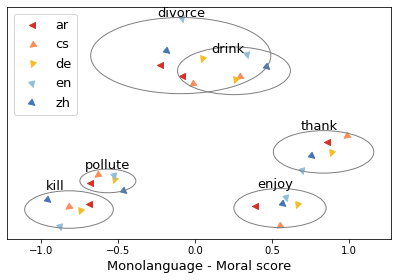

In [133]:
import matplotlib as mpl

colors = ['firebrick','darkblue','green','black','saddlebrown']
colors = ["#d73027", "#fc8d59", "#f5bd25", "#91bfdb", "#4575b4"]
fig, ax = plt.subplots() #5,12))

kwords = ['kill','pollute', 'blame', 'care',  'enjoy','thank']
kwords = ['kill','pollute', 'enjoy','thank']
kwords = ['kill','pollute', 'enjoy','thank', 'divorce', 'drink']
for i, k in enumerate(kwords):

    #plt.title(k)
    max_c = max([(pd_1_only[k]-pd_1_only[k].mean()).abs().max(),(pd_2_only[k]-pd_2_only[k].mean()).abs().max()])
    c = plt.Circle((pd_1_only[k].mean(),pd_2_only[k].mean()),max_c+.027,color='gray',fill=False)
    ax.add_patch(c)
    #plt.plot([pd_1_only[k].mean()],[pd_2_only[k].mean()],c='gray',marker='x')

for i, k in enumerate(kwords):

    handles = []
    for j in range(5):    
        t = mpl.markers.MarkerStyle(marker='<')
        t._transform = t.get_transform().rotate_deg(j*35)

        h = plt.scatter([pd_1_only[k][j]], [pd_2_only[k][j]], c=colors[j], 
                marker= t)
        handles.append(h)

    
    ax.text(pd_1_only[k].mean()-.15, pd_2_only[k].mean()+(pd_2_only[k]-pd_2_only[k].mean()).abs().max()+.035, k, fontsize=13)

fontproperties = {'size': 13}

ax.set_xlabel('Monolanguage - Moral score', fontproperties)
#ax.spines['left'].set_color('none')

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    #top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
"""
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
"""
#plt.ylim(-.85,.85)
plt.xlim(-1,1)
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)
plt.tight_layout()
plt.axis('tight')
#plt.title('close')
plt.legend(handles,['ar','cs','de','en','zh'],prop={'size':13},loc='upper left') #,prop=fontproperties)
plt.savefig('mono_moral_scores.pdf',bbox_inches='tight')

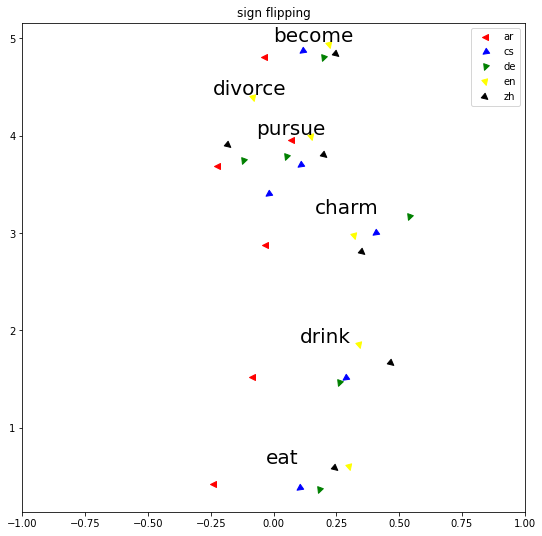

In [114]:
import matplotlib as mpl

keys = ['drink','eat','divorce','charm','pursue','become']
colors = ['red','blue','green','yellow','black']
fig, ax = plt.subplots(figsize=(9,9))
for i, k in enumerate(keys):

    #plt.title(k)
    max_c = max([(pd_1_only[k]-pd_1_only[k].mean()).abs().max(),1*i+(pd_2_only[k]-pd_2_only[k].mean()).abs().max()])
    c = plt.Circle((pd_1_only[k].mean(),.5*i+pd_2_only[k].mean()),max_c+.027,color='gray',fill=False)
    #ax.add_patch(c)

for i, k in enumerate(keys):

    handles = []
    for j in range(5):    
        t = mpl.markers.MarkerStyle(marker='<')
        t._transform = t.get_transform().rotate_deg(j*35)

        h = plt.scatter([pd_1_only[k][j]], [1*i+pd_2_only[k][j]], c=colors[j], 
                marker= t)
        handles.append(h)
    #plt.ylim(-1,1)
    plt.xlim(-1,1)
    
    ax.text(pd_1_only[k].mean()-.15, 1*i+pd_2_only[k].mean()+(pd_2_only[k]-pd_2_only[k].mean()).abs().max()+.035, k, fontsize=20)

plt.title('sign flipping')
plt.legend(handles,['ar','cs','de','en','zh'])
plt.savefig('mono_sign_flipping.pdf')

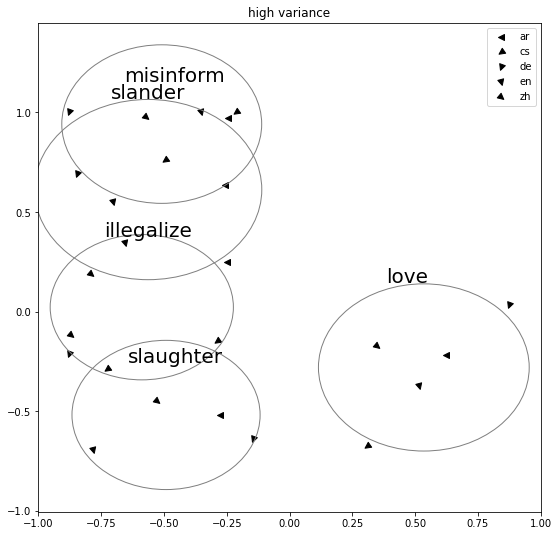

In [115]:
import matplotlib as mpl
keys = ['slaughter','illegalize', 'love', 'slander',  'misinform']
colors = ['red','blue','green','yellow','black']
fig, ax = plt.subplots(figsize=(9,9))

for i, k in enumerate(keys):

    #plt.title(k)
    max_c = max([(pd_1_only[k]-pd_1_only[k].mean()).abs().max(),(pd_2_only[k]-pd_2_only[k].mean()).abs().max()])
    c = plt.Circle((pd_1_only[k].mean(),pd_2_only[k].mean()),max_c+.027,color='gray',fill=False)
    ax.add_patch(c)

for i, k in enumerate(keys):

    handles = []
    for j in range(5):    
        t = mpl.markers.MarkerStyle(marker='<')
        t._transform = t.get_transform().rotate_deg(j*35)

        h = plt.scatter([pd_1_only[k][j]], [pd_2_only[k][j]], c='black', 
                marker= t)
        handles.append(h)
    #plt.ylim(-1,1)
    plt.xlim(-1,1)
    
    ax.text(pd_1_only[k].mean()-.15, pd_2_only[k].mean()+(pd_2_only[k]-pd_2_only[k].mean()).abs().max()+.035, k, fontsize=20)

plt.title('high variance')
plt.legend(handles,['ar','cs','de','en','zh'])
plt.savefig('mono_high_variance.pdf')